# 1. Problem statement

**Recurrent neural network (RNN)** Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

 - We are given Google stock price from 01/2012 to 12/2017. 
 - The task is to predict the trend of the stock price for 01-06 2018. 

# 2. Import library

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# 3. Data Collection

### 3.0 import the data

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [6]:
training_set.shape

(1509, 1)

### 3.1 Feature scaling

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

### 3.2 Data structure creation

- taking the reference of past 60 days of data to predict the future stock price.  
- It is observed that taking 60 days of past data gives us best results.  
- In this data set 60 days of data means 3 months of data.  
- Every month as 20 days of Stock price.   
- X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [8]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1449, 60)

In [10]:
y_train.shape

(1449,)

### 3.3 Data reshaping

In [11]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

1. Number of stock prices - 1449  
2. Number of time steps - 60  
3. Number of Indicator - 1  

In [12]:
X_train.shape

(1449, 60, 1)

# 4. Exploratory Data Analysis

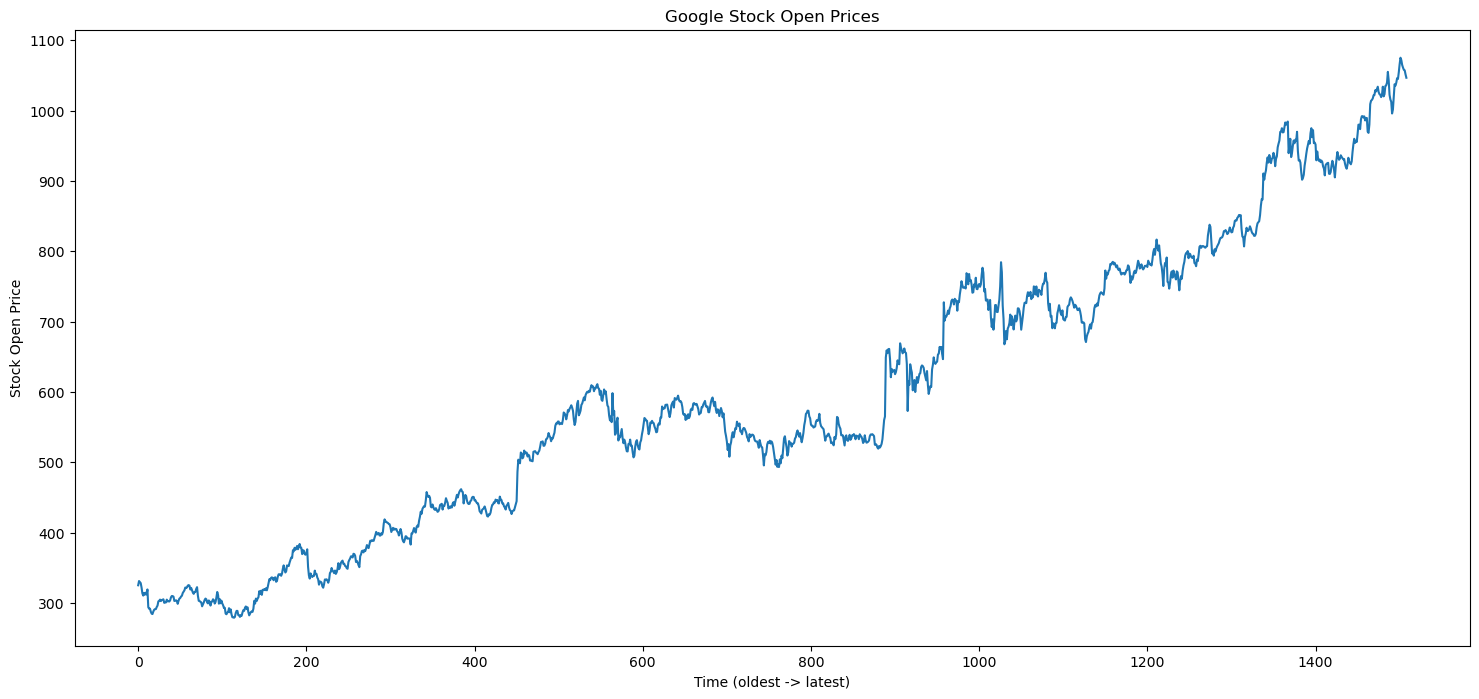

In [13]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

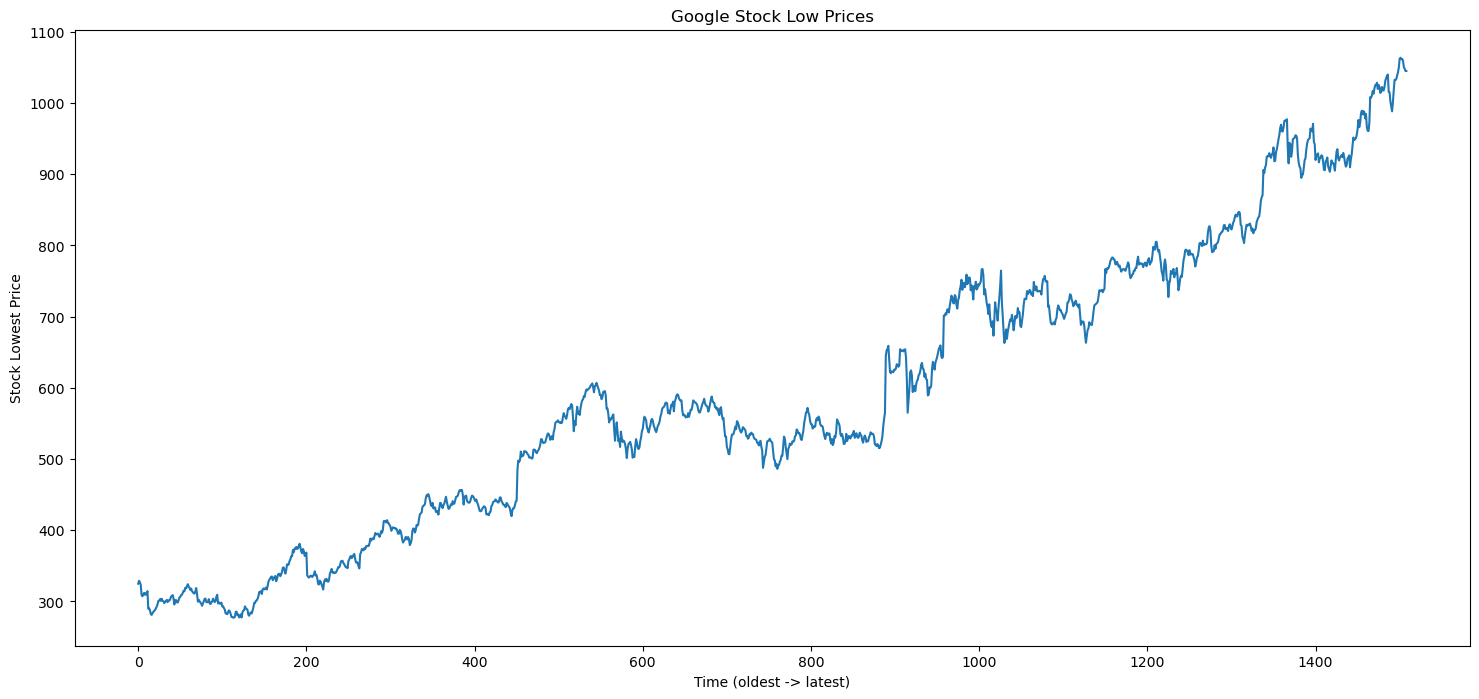

In [14]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

# 5. Create & Fit Model

### 5.1 Create model

In [15]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

C:\Users\sumit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### 5.2 Model fit

In [17]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0617
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0039
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0038
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0034
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0029
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0029
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0027
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0026
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0026
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0024
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0026
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0031
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0022
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0024
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - l

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0011
Epoch 82/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0010
Epoch 83/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 9.7114e-04
Epoch 84/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0012
Epoch 85/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0010
Epoch 86/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 9.2609e-04
Epoch 87/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 8.7281e-04
Epoch 88/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0012
Epoch 89/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0010
Epoch 90/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 8.5777e-04
Epoch 91/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 8.7783e-04
Epoch 92/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 8.9723e-04
Epoch 93/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0012
Epoch 94/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0011
Epoch 95/100
46/46 ━━━━━━━━━━━━━━━━━

# 6. Model evaluation

### 6.1 Read and convert

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [19]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [20]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

### 6.2 Concat and convert

In [21]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

### 6.3 Reshape and scale

In [22]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [23]:
len(inputs)

185

### 6.4 Create test data strucutre

In [24]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
X_test.shape

(125, 60, 1)

# 7. Model prediction

In [26]:
predicted_stock_price = regressor.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


In [27]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### 7.1 Result visualization

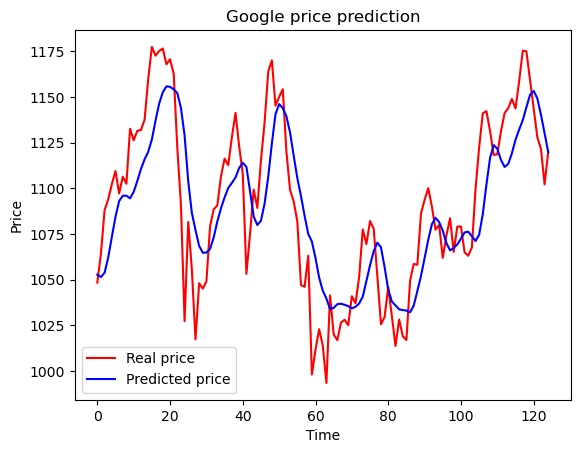

In [28]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()